
## K-Nearest Neighbors

As a refresher, Machine Learning is a subset of artificial intelligence (AI) where the primary goal is for computers to learn from data without being explicitly programmed. Generally, we can categorize machine learning tasks into two main types:

1. **Supervised Learning**: The model is trained on a labeled dataset, which means for every input data, the correct result (or output) is known. Once trained, the model can start making predictions on new, unseen data.

2. **Unsupervised Learning**: The model is trained on an unlabeled dataset, trying to learn the underlying structures from the data, such as grouping or clustering similar data points together.

### Model-based Learning vs. Instance-based Learning

Within supervised learning, we can distinguish between model-based and instance-based learning, as follows.

#### Model-based Learning

- In model-based learning, the algorithm builds a model on the training data to make predictions or decisions without needing the original training data anymore.
- It essentially tries to abstract or generalize from the examples it is provided.

**Example**: Linear Regression where a line (in 2D) or hyperplane (in higher dimensions) is fitted to the data points.

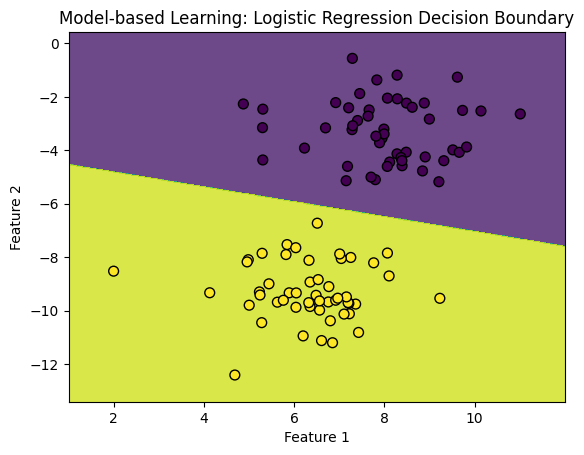

In [4]:

# Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs


# Generate a random dataset with 2 blobs (centers of two classes)
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.2)

# Fit logistic regression
clf = LogisticRegression().fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class labels for each mesh grid point
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('Model-based Learning: Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



#### Instance-based Learning

- In instance-based learning, the algorithm uses the training instances (or examples) themselves to make predictions.
- It doesn't build an explicit model; instead, it memorizes the training instances.

**Example**: K-Nearest Neighbors (KNN). Given a new input, KNN looks at 'k' training instances that are closest to the input and returns the most common output value among them.


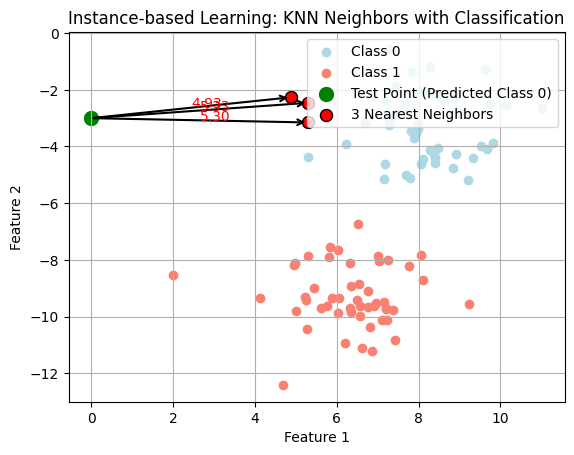

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Using the same dataset from the previous example
data_points = X
test_point = np.array([[0, -3]])

# Fit KNeighborsClassifier for the dataset with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_points, y)
test_point_label = knn.predict(test_point)

# Find 3 closest points to the test point using NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=3).fit(data_points)
distances, indices = neighbors.kneighbors(test_point)

# Plotting
plt.scatter(data_points[y == 0][:, 0], data_points[y == 0][:, 1], color='lightblue', label='Class 0')
plt.scatter(data_points[y == 1][:, 0], data_points[y == 1][:, 1], color='salmon', label='Class 1')
plt.scatter(test_point[:, 0], test_point[:, 1], color='green', s=100, 
            label=f'Test Point (Predicted Class {test_point_label[0]})')
plt.scatter(data_points[indices][0][:, 0], data_points[indices][0][:, 1], color='red', 
            label='3 Nearest Neighbors', s=75, edgecolors='k')

# Annotating the distances to the neighbors
for index in indices[0]:
    plt.annotate("", xy=data_points[index], xytext=test_point[0], 
                 arrowprops=dict(arrowstyle="->", lw=1.5))
    plt.text((data_points[index][0] + test_point[0][0])/2, 
             (data_points[index][1] + test_point[0][1])/2, 
             f"{np.linalg.norm(data_points[index]-test_point[0]):.2f}", 
             color='red')

plt.title('Instance-based Learning: KNN Neighbors with Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## 2. Overview of the KNN Algorithm

### Core Concept of KNN:

K-Nearest Neighbors (KNN) is a type of instance-based learning algorithm, primarily used for classification and regression. At its core, KNN relies on the intuitive premise that similar things exist in close proximity. In other words, similar data points in a dataset are closer to each other in the feature space.

Given a new, unseen instance, the KNN algorithm searches the training set for the `k` training examples that are closest to the point, and then returns the most common output value among them:

1. Compute the distance between the new instance and every other instance in the dataset.
2. Sort the distances to determine the closest `k` instances.
3. For classification: Return the mode (most common) class label among the `k` nearest neighbors.
4. For regression: Return the mean of the responses of the `k` nearest neighbors.

### Distance Metrics:

The concept of "closeness" or "distance" is fundamental to the KNN algorithm. Different metrics can be used to calculate the distance between instances:

- **Euclidean Distance**: This is the most common metric. It is the "ordinary" straight-line distance between two points in Euclidean space.
  
 $$ \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$
  
- **Manhattan Distance**: Also known as the "city block" distance. It is the distance between two points measured along axes at right angles (like navigating the blocks of a grid-based city like Manhattan).

  $$ |x_2 - x_1| + |y_2 - y_1| $$
  
- **Minkowski Distance**: A generalized metric. When `p=2`, it's the same as the Euclidean distance. When `p=1`, it's the Manhattan distance.

  $$ \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}} $$

#### Picking a Distance Metric

The distance metric determines how "closeness" is defined between instances in the feature space. The appropriateness of a distance metric depends on the nature of the data:

1. **Nature of Data**: For instance, in a high-dimensional space or when many dimensions are categorical, Euclidean distance might not be the most meaningful. Manhattan distance can sometimes be more appropriate in such scenarios, or one might even consider more advanced distance measures like Jaccard for categorical data.

2. **Scale of Features**: As mentioned earlier, distance metrics are sensitive to the scale of features. This is especially true for both Manhattan and Euclidean distances. Always consider scaling features before computing distances.

3. **Distribution of Data**: In datasets where data points tend to form grid-like structures, Manhattan might perform better, given its axis-aligned nature. On the other hand, in more "free-form" datasets, Euclidean might be more appropriate.

Often, the best way to decide is to empirically test the performance of different distance metrics on your validation data. By comparing the performance of KNN using different distance metrics, you can select the one that works best for your specific application.  Note that some metrics are more computationally intensive than others - e.g., Euclidean requires more mathematical operations than Manhattan distance, especially as the number of dimensions grows. If real-time processing is a goal, a simpler metric might be preferable.

**Example**

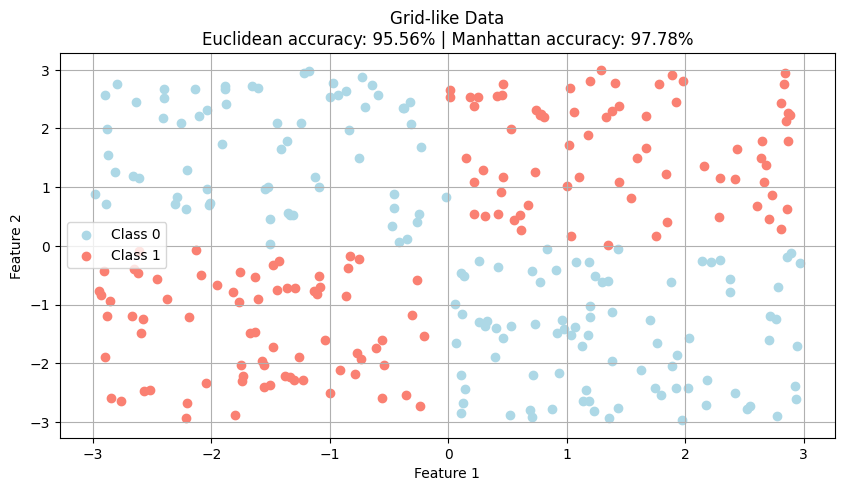

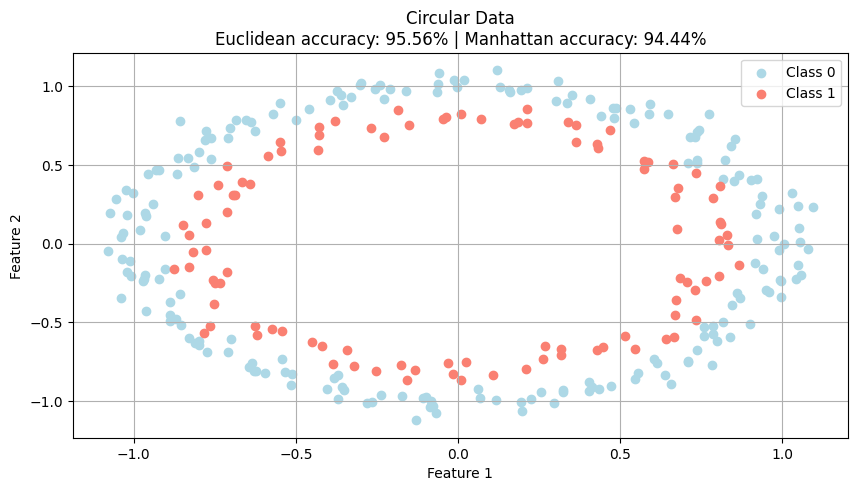

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Grid-like Data Distribution
np.random.seed(0)
X_grid = np.random.rand(300, 2) * 6 - 3  # Random dataset in range [-3,3]
y_grid = ((X_grid[:, 0] > 0) & (X_grid[:, 1] > 0)) | ((X_grid[:, 0] < 0) & (X_grid[:, 1] < 0))
y_grid = y_grid.astype(int)

# 2. Circular Data Distribution
X_circle, y_circle = make_circles(n_samples=(200,100), factor=0.8, noise=0.05)

datasets = [(X_grid, y_grid, 'Grid-like Data'), (X_circle, y_circle, 'Circular Data')]

for X, y, title in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    knn_euclidean = KNeighborsClassifier(n_neighbors=3, p=2)  # p=2 implies Euclidean
    knn_euclidean.fit(X_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test)
    accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
    
    knn_manhattan = KNeighborsClassifier(n_neighbors=3, p=1)  # p=1 implies Manhattan
    knn_manhattan.fit(X_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(X_test)
    accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
    
    plt.figure(figsize=(10,5))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='lightblue', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='salmon', label='Class 1')
    plt.title(f"{title}\nEuclidean accuracy: {accuracy_euclidean*100:.2f}% | Manhattan accuracy: {accuracy_manhattan*100:.2f}%")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()



**Importance of Feature Scaling**: Distance metrics are sensitive to features' magnitudes. Features with higher magnitudes (like a salary in the thousands) will weigh more than features with smaller magnitudes (like age). This can distort the distance measurements. Therefore, it's essential to scale features so that they have similar magnitudes, ensuring that each feature contributes equally to the distance computation.

### Deciding the Value of 'k':

Choosing an appropriate value for `k` is crucial. The choice of `k` impacts the performance and characteristics of the KNN algorithm:

- **Small `k`**: A small value of `k`, such as `k=1`, means that the noise in the training data will have a higher influence on the result. It can lead to overfitting, where the model is too sensitive to the training data and may not generalize well to new data.

- **Large `k`**: A large value makes the algorithm computationally more expensive, as more instances need to be checked. Additionally, it might start to include points from other classes, making the decision boundaries less distinct.

**Elbow Method**: One way to find an optimal `k` is to plot the model's performance (like accuracy or error rate) against different values of `k`. Typically, as `k` increases, error rates will decrease and then plateau or even start increasing. The "elbow" of the curve, where the rate of decrease sharply changes, can be a good estimate for `k`. It provides a balance between overfitting (too low `k`) and underfitting (too high `k`).

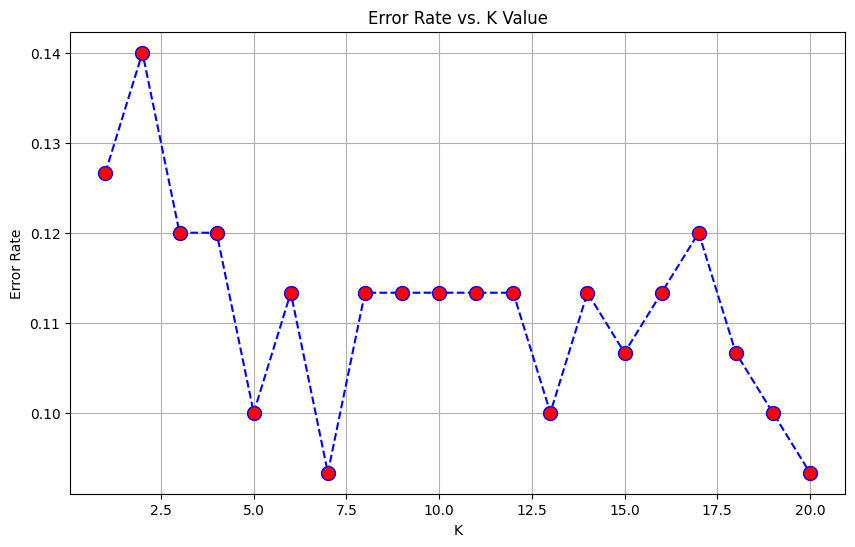

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Hold the error rates
error_rates = []

# For each k value
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Calculate and store the error rate
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


Note that unlike with clustering, the "elbow" is often not distinct, and might actually appear as something more like a "valley". For instance, in situations with imbalanced data or when there are numerous small clusters of a minority class within a majority class, too high a value of `k` can lead to misclassifications. The reason for this is straightforward: as `k` increases, the likelihood that a majority of the neighbors are from the dominant class increases, which can overshadow the presence of a minority class.

The key takeaway is that the pattern you observe when plotting error rates vs. `k` is very much dependent on the nature and distribution of your data. This is why understanding your data and visual inspection of the curve is crucial. While automated methods can help in selecting `k`, the final decision often benefits from human judgment and understanding of the underlying data distribution.

### 3. Advantages of KNN

- **Non-parametric**:
  - KNN is non-parametric, which means it doesn't make any explicit assumptions about the underlying distribution of data. This is especially valuable when the true distribution is unknown or non-standard. Many parametric methods assume the data follows a specific distribution, like a Gaussian. When this assumption is violated, these models can produce suboptimal results.
  
- **Versatility**:
  - KNN is versatile in its applications. It can be used for both classification tasks (assigning a label to instances) and regression tasks (predicting a continuous value). The primary difference lies in the output: for classification, KNN votes for the class, and in regression, it averages the values.
  
- **Flexibility in Decision Boundaries**:
  - Unlike linear models that can only represent linear decision boundaries, KNN can capture more complex decision boundaries. As KNN relies on local information, its decision boundary can bend to fit the data. This flexibility allows KNN to adapt to various shapes of data distributions.

### 4. Disadvantages of KNN

- **Sensitive to Noisy Data**:
  - KNN is highly sensitive to noise in the dataset. Since KNN relies on the proximity of instances, outliers can significantly sway the model's predictions. For instance, if an outlier from one class lies closer to the majority of another class, it can cause misclassifications in that region.
  
- **Computational Cost**:
  - One major drawback of KNN is its computational expense. For each prediction, KNN calculates the distance between the input instance and every other instance in the dataset. This can be prohibitively slow for datasets with a large number of instances. Although certain data structures like KD-Trees and Ball Trees can optimize this, they don't scale well with high-dimensional data.
  
- **Memory Intensive**:
  - KNN is a lazy learner, meaning it doesn't explicitly learn a model during training. Instead, it memorizes the entire dataset. This characteristic makes KNN memory-intensive, especially with large datasets. As data grows, so does the memory requirement.
  
- **Curse of Dimensionality**:
  - KNN suffers from the curse of dimensionality. In high-dimensional spaces, the concept of "nearness" or "distance" becomes less distinct. Distances between instances tend to converge, making it hard for KNN to find meaningful neighbors. This convergence often results in degraded performance. Feature selection and dimensionality reduction techniques like PCA become vital in such cases.

In conclusion, while KNN offers a straightforward and intuitive approach to both classification and regression, it's essential to understand its limitations. Ensuring data quality, selecting appropriate distance metrics, and choosing an optimal `k` value are crucial for the effective application of KNN.

### KNN Regression

While KNN is commonly associated with classification tasks, it can be effectively used for regression as well. In KNN regression, the prediction is based on the average (or sometimes the median) of the `k` nearest neighbors, rather than voting on a category label.

#### Algorithm:
1. For a given test point and a chosen distance metric, find the `k` training examples that are closest to the point.
2. Compute the average (or another central tendency measure) of the outputs of these `k` training examples.
3. Use this average as the prediction for the test point.

#### Key Features:

- **Averaging Neighbors**: Unlike in classification, where the `k` nearest neighbors vote on a label, in regression, we take the average of the `k` nearest neighbors' values. For instance, if we're predicting house prices and the three nearest houses are priced at $200,000, $220,000, and $210,000, the predicted price for our query point might be the average, which is $210,000.

- **Weighted Averaging**: In some implementations of KNN regression, closer neighbors can be given more weight in the averaging process. This ensures that data points that are closer to the query point have a larger influence on the prediction.

- **Flexible Decision Boundaries**: Just like with KNN classification, KNN regression can capture non-linear relationships in the data without the need for a predetermined model form.

#### Considerations:

KNN regression has the same sorts of considerations as KNN classifiers - sensitivity to outliers, importance of scaling, choice of `k`, and the type of distance metric used.

## Exercise: KNN and Pipelines

In the following exercise, we're going to work step be step through the application of KNN to a dataset, but we'll also take this opportunity to introduce the `pipeline` API in sklearn, which makes it much easier to apply preprocessing as part of a cross-validation procedure.

This exercise has three parts.  In each step, you will be asked to improve the code until we finally arrive at a "correct" and efficient procedure.

### Step 1:  Add preprocessing

There are several problems with the following code, including:

- We applied label encoding on the entire dataset.
- We just dropped rows (~177) that had nulls.
- Features are on different scales, which can be problematic for KNN.

Fix these errors.

In [31]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [65]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Load the dataset
data = sns.load_dataset('titanic')

#drop unnecessary columns - these are unique to seaborn
data = data.drop(['class','who','class','adult_male','deck','embark_town','alive','alone'],axis=1)

#removing rows with NA
data.dropna(inplace=True)


# Split into features and target
X = data.drop("survived", axis=1)
y = data["survived"]

label_encoders = {}
categorical_cols = ['sex', 'embarked']

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

knn = KNeighborsClassifier(n_neighbors=3)

score = cross_val_score(knn,X,y,cv=5,scoring="f1_macro")
print(f"Average F1 Score: {np.mean(score)}")


Average F1 Score: 0.6722605752548864


### Part 2: Add a column transformer and pipeline

When you have a bunch of data operations like this, it can be useful to use a column transformer, which allows you to bundle several operations together. It's useful when different columns or types of variables in your dataset need different preprocessing steps.  Here's an example:


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assume a sample dataset with 'age', 'gender' (categorical), and 'income'
data = [
    [25, 'male', 50000],
    [30, 'female', 55000],
    [35, 'male', 60000]
]

# Create the transformer
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [1]), # One-hot encode the 'gender' column
        ('scale', StandardScaler(), [0, 2]) # Scale 'age' and 'income'
    ],
    remainder='passthrough'
)

# Apply the transformer
transformed_data = transformer.fit_transform(data)
print(transformed_data)


[[ 0.          1.         -1.22474487 -1.22474487]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          1.22474487  1.22474487]]


Note, however, the `ColumnTransformer` concatenates it's results to the data, so that it is effectively impossible to apply multiple operations to a single column.  For example:

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = [[25], [30], [None], [28]]

# Applying imputer and scaler separately on the same 'age' column
transformer = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'), [0]),
        ('scaler', StandardScaler(), [0])
    ],
    remainder='passthrough'
)

transformed_data = transformer.fit_transform(data)
print(transformed_data)

[[25.         -1.29777137]
 [30.          1.13554995]
 [27.66666667         nan]
 [28.          0.16222142]]


In order to apply multiple operations (say, imputation and then encoding), we need a `Pipeline` component. A Pipeline in scikit-learn is a way to streamline a lot of the routine processes by encapsulating little steps of the machine learning process into a single step. Each step in the pipeline is represented as a tuple (name, transform). These sequences of steps are executed in order.

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assume a sample dataset with 'age' (some missing), 'gender' (categorical, with missing values), and 'income'
data = np.array([
    [25, 'male', 50000],
    [30, np.nan, 55000],
    [np.nan, 'male', 60000],
    [28, 'female', np.nan]
],dtype=object)

# For the age and income columns, we want to impute missing values and then scale them.
# For the gender column, we want to impute missing values and then one-hot encode.

# Pipelines for numerical and categorical transformations
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder())
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, [1]),
        ('num', numerical_pipeline, [0, 2])       
    ]
)

# Apply the column transformer
transformed_data = preprocessor.fit_transform(data)
print(transformed_data)
print("As a data frame:")
pd.DataFrame(transformed_data,columns=preprocessor.get_feature_names_out())

[[ 0.          1.         -1.4985373  -1.41421356]
 [ 0.          1.          1.31122014  0.        ]
 [ 0.          1.          0.          1.41421356]
 [ 1.          0.          0.18731716  0.        ]]
As a data frame:


,cat__x1_female,cat__x1_male,num__x0,num__x2
0,0.0,1.0,-1.498537,-1.414214
1,0.0,1.0,1.311220,0.000000
2,0.0,1.0,0.000000,1.414214
3,1.0,0.0,0.187317,0.000000


Use a ColumnTransformer to simplify the following code!

In [63]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import f1_score

# Load the dataset
data = sns.load_dataset('titanic')

#drop unnecessary columns - these are unique to seaborn
data = data.drop(['class','who','class','adult_male','deck','embark_town','alive','alone'],axis=1)

categorical_cols = ['sex', 'embarked']

# Impute 'embarked' using SimpleImputer
# Note that we have to do this *before* one-hot encoding
simple_imputer = SimpleImputer(strategy="most_frequent")
data['embarked'] = simple_imputer.fit_transform(data['embarked'].values.reshape(-1, 1)).ravel()

# One Hot Encoding for categorical columns using OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoded_cols = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Resetting index of the main dataframe to match with the encoded dataframe index 
data.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded columns to the original dataframe
data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns as they're now one-hot encoded
data.drop(columns=categorical_cols, inplace=True)

# Impute 'age' using KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
data['age'] = knn_imputer.fit_transform(data['age'].values.reshape(-1, 1))



# Split into features and target
X = data.drop("survived", axis=1)
y = data["survived"]

knn = KNeighborsClassifier(n_neighbors=3)

score = cross_val_score(knn,X,y,cv=5,scoring="f1_macro")
print(f"Average F1 Score: {np.mean(score)}")

Average F1 Score: 0.6858233386858235


### Part 3: Using a pipeline to prevent data leakage.

Note that the preceding code is cleaner, but has a data leakage problem, because the test data is included when preprocessing is done.  To avoid data leakage, you want to perform any preprocessing does any inference on the _just_ the training data in each fold. The `pipeline` component can in fact be used to fix this problem.

For example, the following code:

```python
# Create and evaluate the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])
```

would do the following:

1. The training data is transformed.
2. The transformation logic is learned from the training data (i.e., what values to impute, what categories exist for one-hot encoding, etc.).
3. The same transformation logic is applied to the test data for that fold.
4. The model is trained on the transformed training data.
5. The trained model is scored against the transformed test data.

Apply this strategy to the following code.

In [62]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import f1_score

# Load the dataset
data = sns.load_dataset('titanic')

#drop unnecessary columns - these are unique to seaborn
data = data.drop(['class','who','class','adult_male','deck','embark_town','alive','alone'],axis=1)

# Split into features and target
X = data.drop("survived", axis=1)
y = data["survived"]

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), ['sex', 'embarked']),
        ('num', KNNImputer(n_neighbors=3), ['age'])
    ], 
    remainder='passthrough'
)


# Transform the data using the column transformer
X_transformed = preprocessor.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

score = cross_val_score(knn,X_transformed,y,cv=5,scoring="f1_macro")
print(f"Average F1 Score: {np.mean(score)}")

Average F1 Score: 0.6858233386858235
